## SVM(Support Vector Machine)
- ML에서 오랬동안 연구되었고 성능이 좋은 모델
- DL보다 성능이 좋은 경우도 있음

In [2]:
#모듈 로딩
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

[1] 데이터 준비

In [3]:
digit = load_digits()

In [4]:
# dat, target 분리
data = digit['data']
target = digit['target']

In [5]:
print(f'data : {data.shape}', f'target : {target.shape}')

data : (1797, 64) target : (1797,)


In [6]:
print(f'{target[0]} \n {digit["images"][0]}')

0 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


[1] 데이터 준비

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state= 42
)

[2] 모델 생성

In [8]:
model = SVC()

model.fit(train_input, train_target)

SVC()

[3] 모델 평가

In [9]:
print('모델의 훈련 데이터 점수 :', model.score(train_input, train_target))
print('모델의 테스트 데이터 점수 :', model.score(test_input, test_target))

모델의 훈련 데이터 점수 : 0.9962880475129918
모델의 테스트 데이터 점수 : 0.9866666666666667


[*] 오답 확인

In [10]:
list_Score = []
list_Worng = []

for i in range(0, len(test_input)):
    if test_target[i] == model.predict([test_input[i]]):
        list_Score.append(i)
    else :
        list_Worng.append(i) 

print('맞추는 경우 : ', list_Score)
print('틀리는 경우 : ', list_Worng)


맞추는 경우 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,

118, 133, 159, 249, 339, 431 을 틀렸음

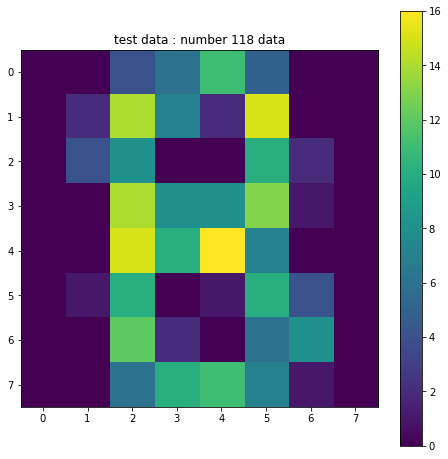

예측값 : [9]
정답 : 8


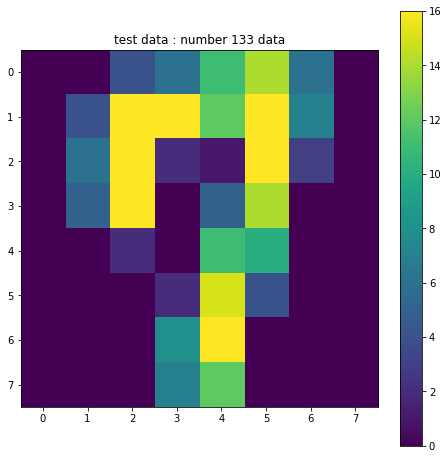

예측값 : [9]
정답 : 7


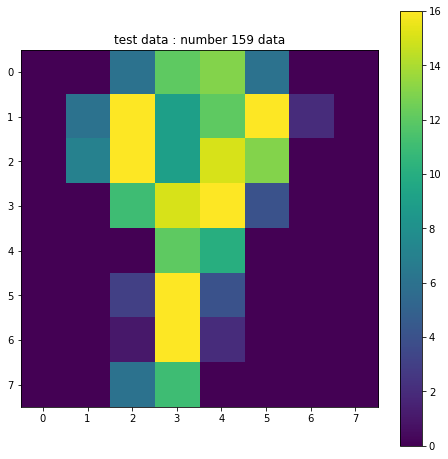

예측값 : [7]
정답 : 9


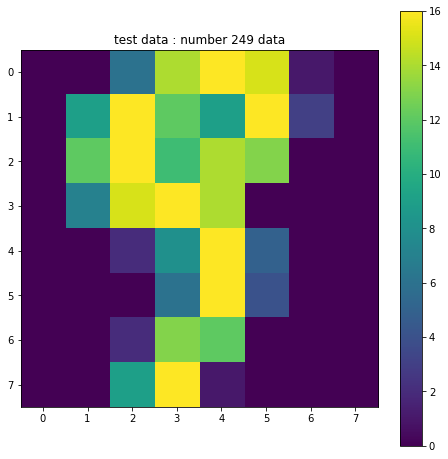

예측값 : [5]
정답 : 9


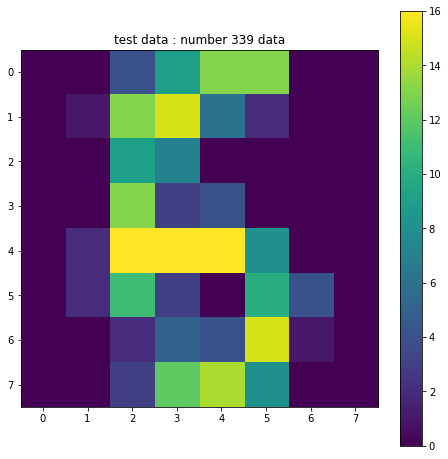

예측값 : [6]
정답 : 5


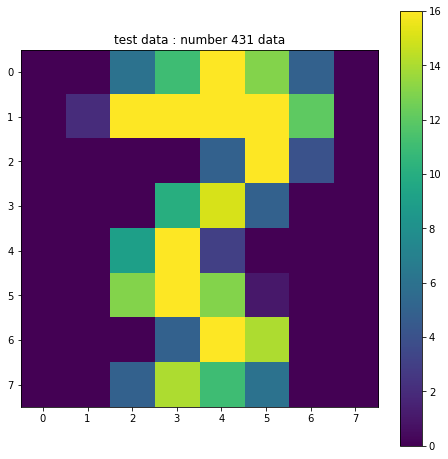

예측값 : [8]
정답 : 3


In [11]:
list_Wrong_ans = []
list_Wrong_Ans = []

for i in range(0, len(list_Worng)):
    plt.figure(figsize=(8,8))
    # 보고싶은 train 데이터 설정
    num = list_Worng[i]
    plt.imshow(test_input[num].reshape(8,8))
    plt.colorbar()
    plt.title(f'test data : number {num} data')

    num_pre = model.predict([test_input[num]])
    plt.show()
    list_Wrong_ans.append(test_target[num])
    list_Wrong_Ans.append(num_pre)
    print('예측값 :',num_pre)
    print('정답 :', test_target[num])

In [12]:
print(list_Wrong_ans)
print(list_Wrong_Ans)

[8, 7, 9, 9, 5, 3]
[array([9]), array([9]), array([7]), array([5]), array([6]), array([8])]


이 모델을 9을 가장 많이 틀리고 있다